<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_101955023_Vet_Issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [1]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_1.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.01)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 101955023
period = 1.6289230050605  # Orbital period in days
epoch = 1544.71564547728
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.2]
folded_lc = folded_lc[folded_lc.time > -0.2]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_101955023_all_sector_lightcurve.csv


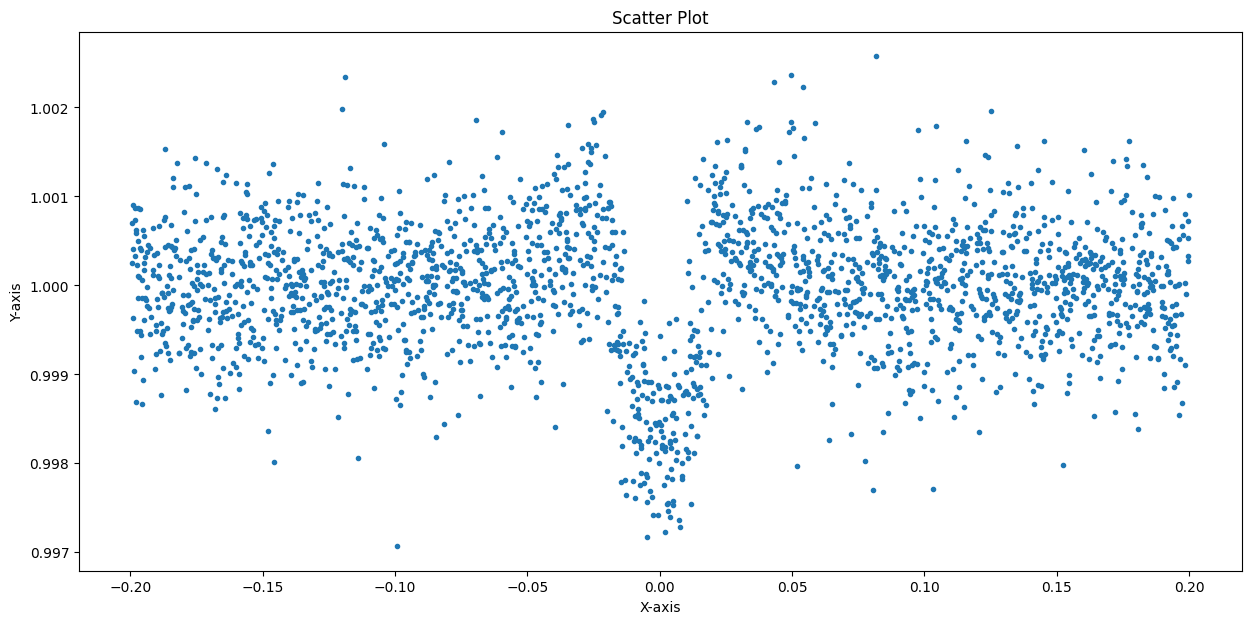

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [4]:
ID = 101955023
sectors = np.array([9, 10, 36, 63])
target = tr.target(ID=ID, sectors=sectors, search_radius=4.5) # target radius shorted

<ipython-input-5-40cccc4470bc>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_9, ap_10, ap_36, ap_63])


Sector 9


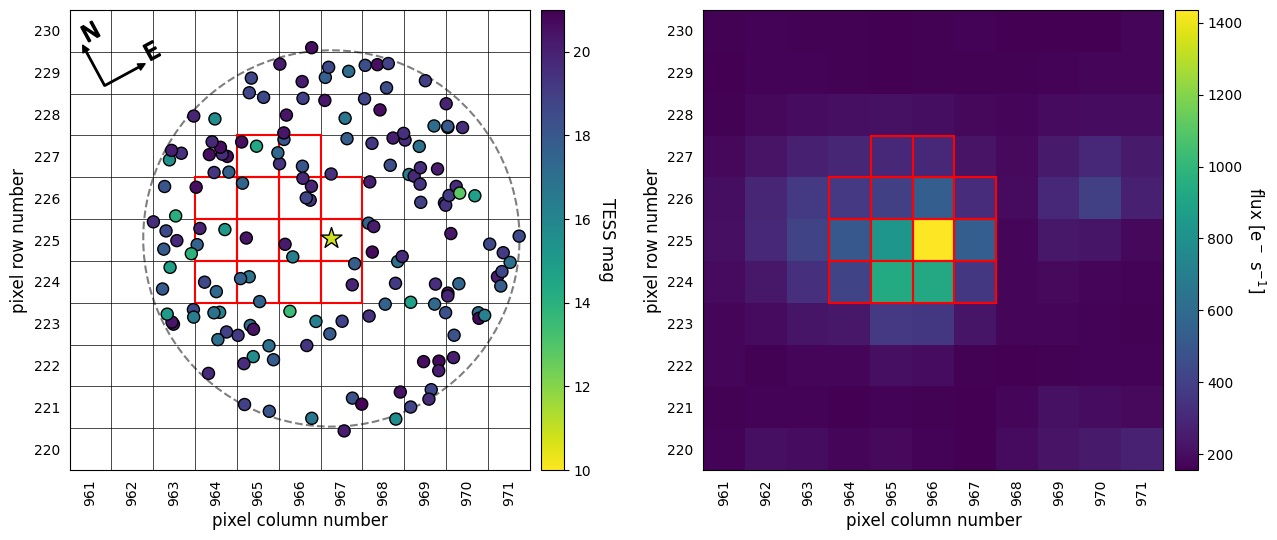

Sector 10


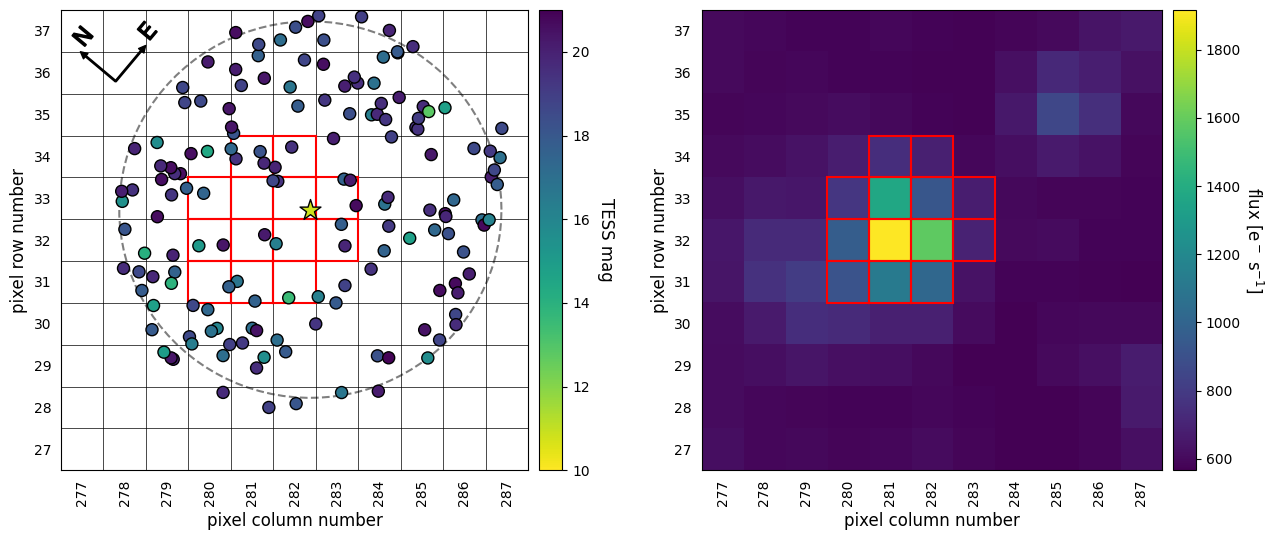

Sector 36


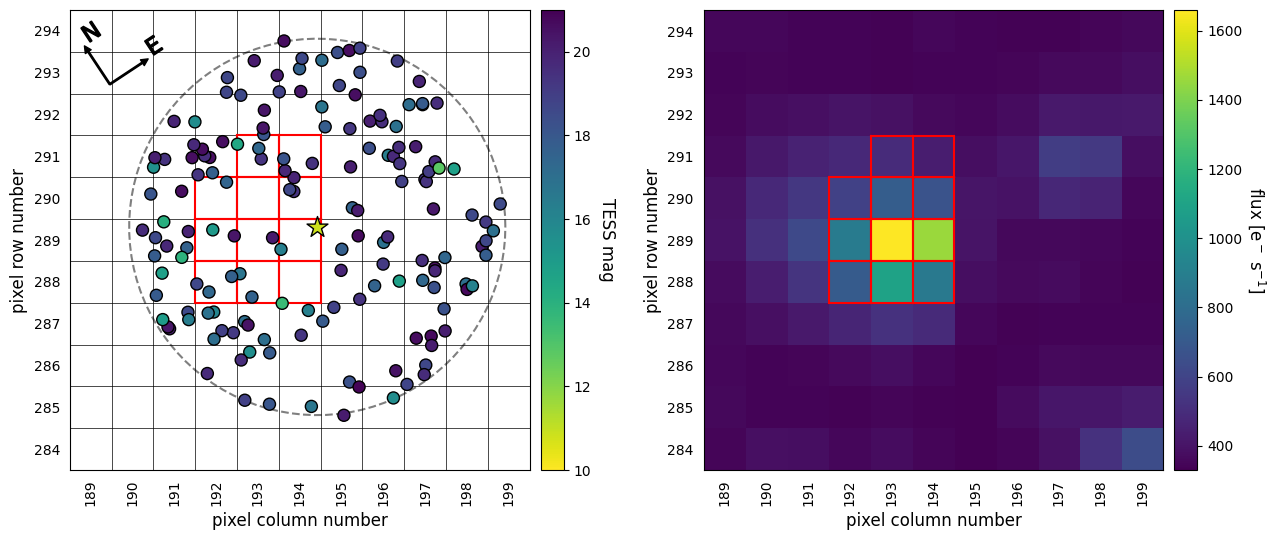

Sector 63


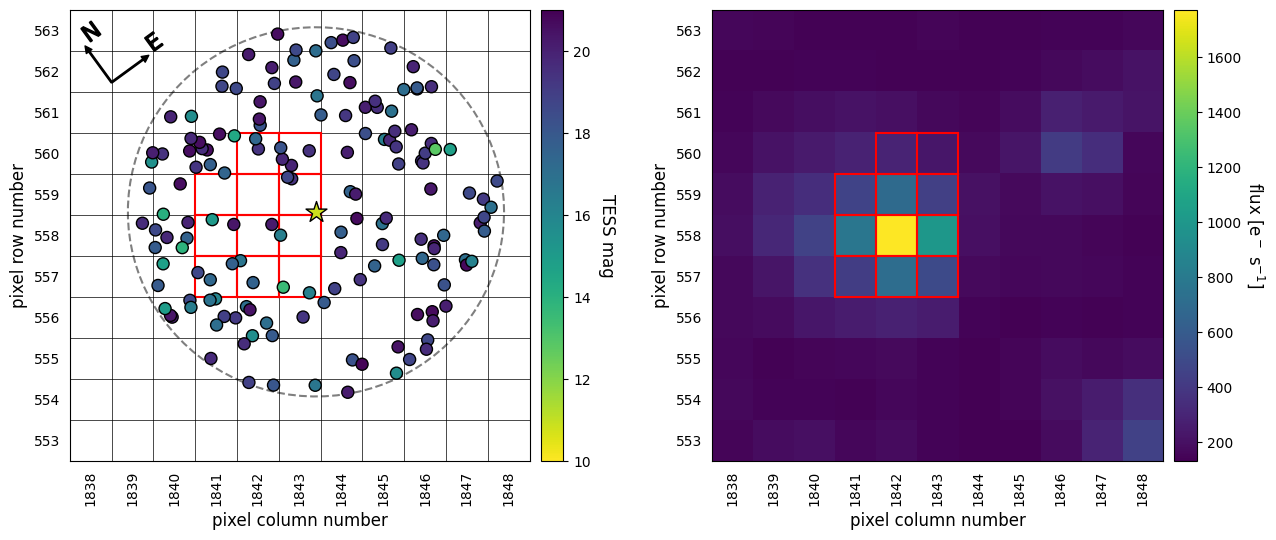

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,101955023,10.8372,9.245,8.666,8.322,153.715743,-47.156719,0.195794,0.226407,3261.0,79.254300,0.000,0.000
1,869692495,17.6953,NaN,NaN,NaN,153.717364,-47.161052,1.330000,0.783826,6506.0,0.137720,16.093,165.727
2,869692431,17.5342,NaN,NaN,NaN,153.723724,-47.157345,0.970000,1.319370,5519.0,0.047746,19.666,96.579
3,869692499,19.3687,NaN,NaN,NaN,153.715766,-47.151052,NaN,NaN,5044.0,-0.547279,20.403,0.158
4,869692440,20.6584,NaN,NaN,NaN,153.721580,-47.160855,NaN,NaN,NaN,NaN,20.636,136.179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,101954969,15.6514,14.943,14.641,14.531,153.709455,-47.181231,1.110000,1.079610,6022.0,0.494806,89.574,189.891
154,869692627,20.6273,NaN,NaN,NaN,153.730833,-47.133898,NaN,NaN,NaN,NaN,90.083,24.219
155,869692468,18.8781,NaN,NaN,NaN,153.684419,-47.169998,0.890000,0.505258,5223.0,0.126698,90.352,238.046
156,869692457,20.1674,NaN,NaN,NaN,153.699271,-47.179295,NaN,NaN,4728.0,0.526000,90.722,206.377


In [5]:
ap_9 = np.array([[964.0, 224.0], [964.0, 225.0], [964.0, 226.0], [965.0, 224.0], [965.0,
        225.0], [965.0, 226.0], [965.0, 227.0], [966.0, 224.0], [966.0, 225.0], [
        966.0, 226.0], [966.0, 227.0], [967.0, 224.0], [967.0, 225.0], [967.0, 226.0]])
ap_10 = np.array([[280.0, 31.0], [280.0, 32.0], [280.0, 33.0], [281.0, 31.0], [281.0, 32.0],
      [281.0, 33.0], [281.0, 34.0], [282.0, 31.0], [282.0, 32.0], [282.0, 33.0], [
        282.0, 34.0], [283.0, 32.0], [283.0, 33.0]])
ap_36 = np.array([[192.0, 288.0], [192.0,
        289.0], [192.0, 290.0], [193.0, 288.0], [193.0, 289.0], [193.0, 290.0], [
        193.0, 291.0], [194.0, 288.0], [194.0, 289.0], [194.0, 290.0], [194.0, 291.0]])
ap_63 = np.array([[1841.0, 557.0], [1841.0, 558.0], [1841.0, 559.0], [1842.0, 557.0], [1842.0,
        558.0], [1842.0, 559.0], [1842.0, 560.0], [1843.0, 557.0], [1843.0, 558.0],
      [1843.0, 559.0], [1843.0, 560.0]])

apertures = np.array([ap_9, ap_10, ap_36, ap_63])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [6]:
tdepth = 1.671 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,101955023,10.8372,9.245,8.666,8.322,153.715743,-47.156719,0.195794,0.226407,3261.0,79.254300,0.000,0.000,8.346156e-01,0.002002
1,869692495,17.6953,NaN,NaN,NaN,153.717364,-47.161052,1.330000,0.783826,6506.0,0.137720,16.093,165.727,8.619277e-04,0.000000
2,869692431,17.5342,NaN,NaN,NaN,153.723724,-47.157345,0.970000,1.319370,5519.0,0.047746,19.666,96.579,6.925856e-04,0.000000
3,869692499,19.3687,NaN,NaN,NaN,153.715766,-47.151052,NaN,NaN,5044.0,-0.547279,20.403,0.158,3.883811e-04,0.000000
4,869692440,20.6584,NaN,NaN,NaN,153.721580,-47.160855,NaN,NaN,NaN,NaN,20.636,136.179,3.424554e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,101954969,15.6514,14.943,14.641,14.531,153.709455,-47.181231,1.110000,1.079610,6022.0,0.494806,89.574,189.891,3.974131e-07,0.000000
154,869692627,20.6273,NaN,NaN,NaN,153.730833,-47.133898,NaN,NaN,NaN,NaN,90.083,24.219,1.295470e-07,0.000000
155,869692468,18.8781,NaN,NaN,NaN,153.684419,-47.169998,0.890000,0.505258,5223.0,0.126698,90.352,238.046,9.376824e-07,0.000000
156,869692457,20.1674,NaN,NaN,NaN,153.699271,-47.179295,NaN,NaN,4728.0,0.526000,90.722,206.377,1.956525e-08,0.000000


In [7]:
%%time

# read in the light curve
lc = pd.read_csv("TIC_101955023_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 101955023.
Calculating EB and EBx2P scenario probabilities for 101955023.
Calculating PTP scenario probability for 101955023.
Calculating PEB and PEBx2P scenario probabilities for 101955023.
Calculating STP scenario probability for 101955023.
Calculating SEB and SEBx2P scenario probabilities for 101955023.
Calculating DTP scenario probability for 101955023.
Calculating DEB and DEBx2P scenario probabilities for 101955023.
Calculating BTP scenario probability for 101955023.
Calculating BEB and BEBx2P scenario probabilities for 101955023.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 869692463.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 101955003.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 101955010.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 101955024.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 869692488.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 1

In [8]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.06504881
NFPP = 0.00630347


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,101955023,TP,0.195794,0.226407,1.628923,87.788991,0.591164,3.014481e-02,238.661262,1.029835,0.000000,0.000000,6.815710e-01
1,101955023,EB,0.195794,0.226407,1.628923,83.691798,1.954826,8.869558e-02,26.992501,0.000000,0.185162,0.216341,3.380811e-71
2,101955023,EBx2P,0.195794,0.226407,3.257846,87.062449,1.423138,6.327754e-01,214.153265,0.000000,0.194892,0.225332,1.576431e-18
3,101955023,PTP,0.195794,0.226407,1.628923,87.664145,0.602162,1.226149e-01,181.798962,1.428039,0.000000,0.000000,5.695246e-02
4,101955023,PEB,0.195794,0.226407,1.628923,83.639456,1.663256,1.960267e-01,65.542642,0.000000,0.169772,0.201678,1.523453e-70
5,101955023,PEBx2P,0.195794,0.226407,3.257846,87.689099,0.618531,6.485661e-01,168.815615,0.000000,0.192795,0.223407,2.798709e-07
6,101955023,STP,0.133514,0.163281,1.628923,88.339180,0.387445,3.806001e-01,154.045113,1.526512,0.000000,0.000000,5.854503e-02
7,101955023,SEB,0.171625,0.203481,1.628923,84.345323,1.882835,6.698387e-02,27.164310,0.000000,0.158181,0.190107,5.428550e-66
8,101955023,SEBx2P,0.153252,0.185010,3.257846,87.705281,0.679806,5.986119e-01,153.848296,0.000000,0.146145,0.177445,3.584065e-10
9,101955023,DTP,0.195794,0.226407,1.628923,87.642884,0.518510,1.935984e-01,133.348669,1.041477,0.000000,0.000000,1.964277e-01


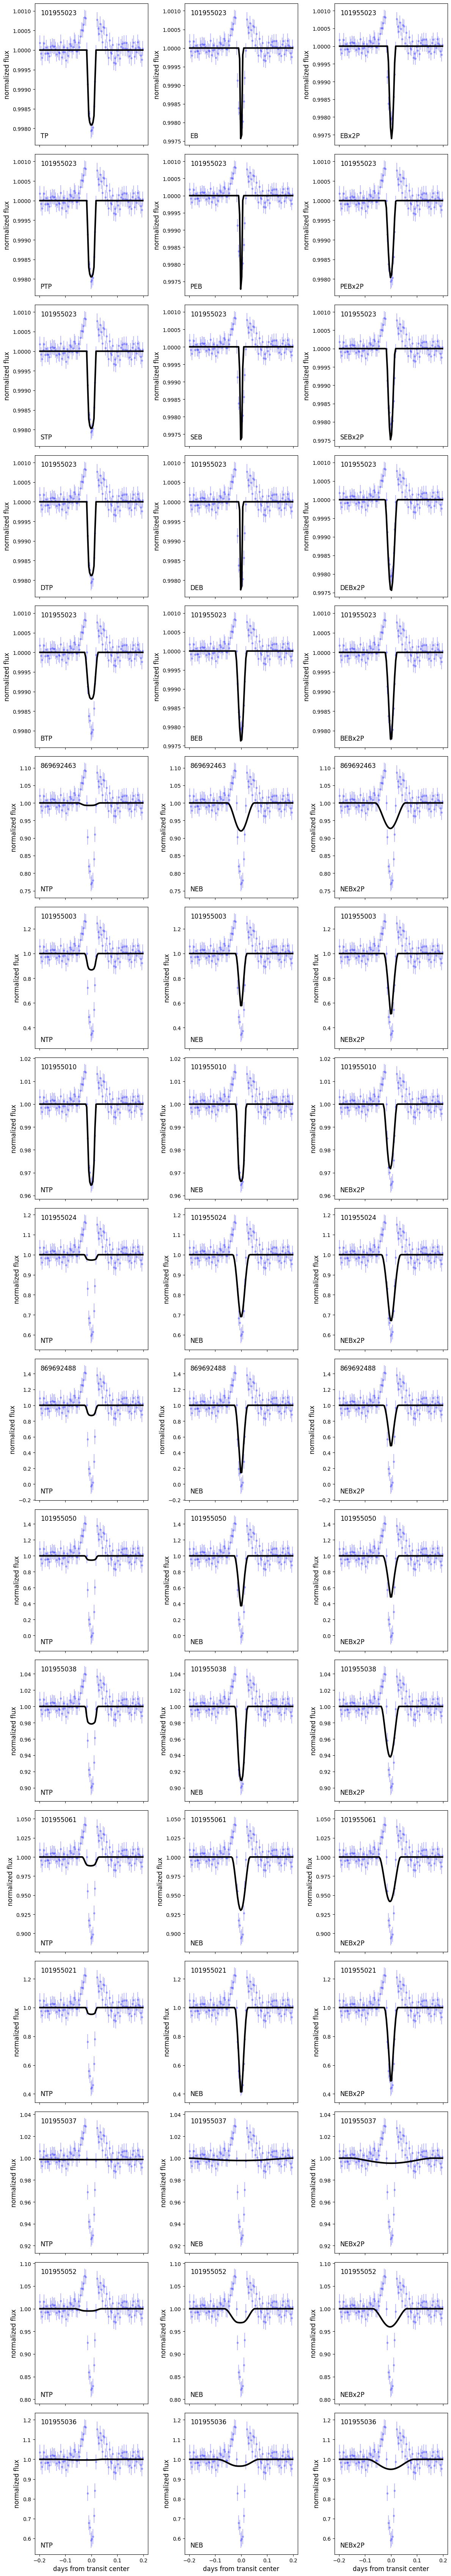

In [9]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [10]:
# Repetations reduced and split
FPPs = np.zeros(10)
NFPPs = np.zeros(10)

In [11]:
# for i in range(4):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i] = target.FPP
#     NFPPs[i] = target.NFPP
# Already done and accounted for

In [ ]:
# print(FPPs)
# print(NFPPs)
# Note:
# [0.06204005 0.06819893 0.06050081 0.06326355 0.         0.
#  0.         0.         0.         0.        ]
# [0.00490949 0.00410114 0.00279381 0.00387591 0.         0.
#  0.         0.         0.         0.        ]

In [13]:
# for i in range(3):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i + 4] = target.FPP
#     NFPPs[i + 4] = target.NFPP
# Already done and accounted for

In [ ]:
# print(FPPs)
# print(NFPPs)
# Note:
# [0.06204005 0.06819893 0.06050081 0.06326355 0.0665065  0.07438117
#  0.07191298 0.         0.         0.        ]
# [0.00490949 0.00410114 0.00279381 0.00387591 0.00763399 0.00403016
#  0.00725175 0.         0.         0.        ]

In [15]:
for i in range(3):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i + 7] = target.FPP
    NFPPs[i + 7] = target.NFPP
# Already done and accounted for

In [16]:
print(FPPs)
print(NFPPs)
# Note:

[0.06204005 0.06819893 0.06050081 0.06326355 0.0665065  0.07438117
 0.07191298 0.08166145 0.05455678 0.06330195]
[0.00490949 0.00410114 0.00279381 0.00387591 0.00763399 0.00403016
 0.00725175 0.00947728 0.00519123 0.00402212]


In [17]:
meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.06663241847643124 +/- 0.007370331995858923
NFPP = 0.0053286888518732835 +/- 0.0019963555344847768


Our final conclusion about this specified planet of TIC 101955023 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).